# MLP (MNIST, Tensorflow)
In this tutorial, we will use MNIST data to practice Multi Layer Perceptron with Tensorflow.

In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
from IPython.display import Image
tf.disable_eager_execution()
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# MLP Architecture
here is the overview of MLP architecture we will implement with Tensorflow

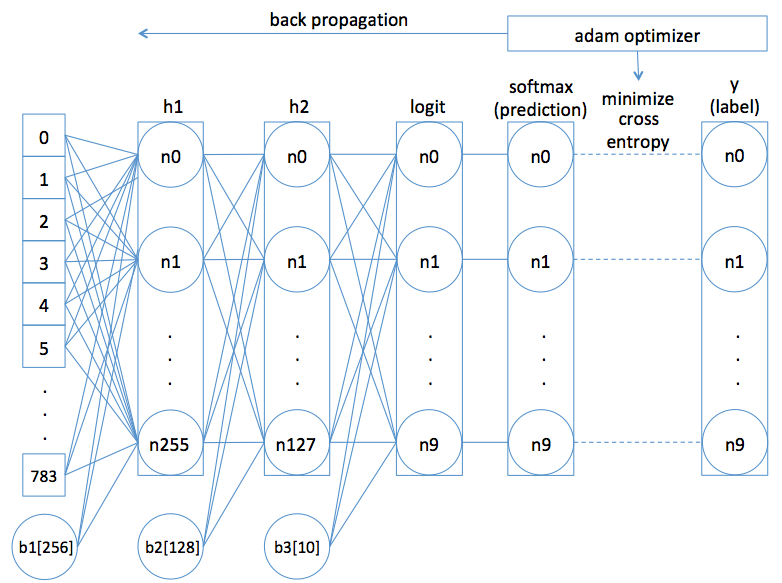

# Collect MNIST Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


train data has **60000** samples  
test data has **10000** samples   
every data is **28 * 28** pixels  

below image shows 28*28 pixel image sample for hand written number '0' from MNIST data.  
MNIST is gray scale image [0 to 255] for hand written number.

![0 from MNIST](https://raw.githubusercontent.com/minsuk-heo/deeplearning/master/img/mnist_sample.png)

# Split train data into train and validation data
Validation during training gives advantages below,  
1) check if train goes well based on validation score  
2) apply **early stopping** when validation score doesn't improve while train score goes up (overcome **overfitting**)

In [5]:
x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]

In [6]:
print("train data has " + str(x_train.shape[0]) + " samples")
print("every train data is " + str(x_train.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

train data has 50000 samples
every train data is 28 * 28 image


In [7]:
print("validation data has " + str(x_val.shape[0]) + " samples")
print("every train data is " + str(x_val.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

validation data has 10000 samples
every train data is 28 * 28 image


28 * 28 pixels has gray scale value from **0** to **255**

In [8]:
# sample to show gray scale values
print(x_train[0][8])

[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
   0   0   0   0   0   0   0   0   0   0]


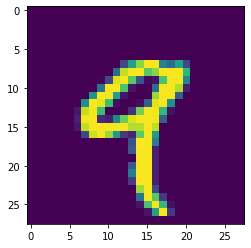

In [9]:
# sample to show gray scale image
import matplotlib.pyplot as plt
plt.imshow(x_train[4], interpolation='nearest')

each train data has its label **0** to **9**

In [10]:
# sample to show labels for first train data to 10th train data
print(y_train[0:9])

[5 0 4 1 9 2 1 3 1]


test data has **10000** samples  
every test data is **28 * 28** image  

In [11]:
print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

test data has 10000 samples
every test data is 28 * 28 image


# Reshape
In order to fully connect all pixels to hidden layer,  
we will reshape (28, 28) into (28x28,1) shape.  
It means we flatten row x column shape to an array having 28x28 (756) items.

![reshape_mnist[1].png](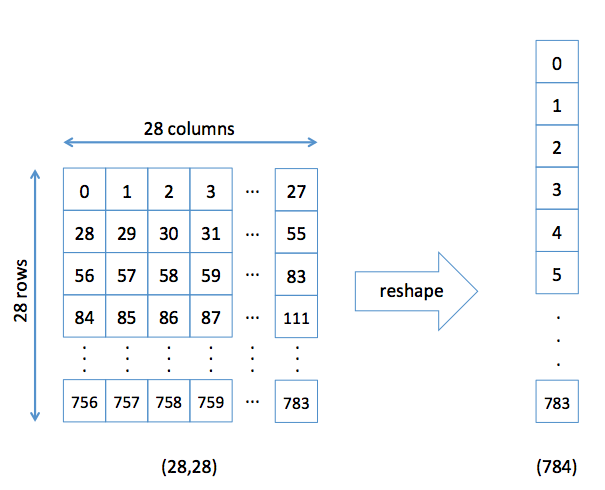)

In [12]:
x_train = x_train.reshape(50000, 784)
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(50000, 784)
(10000, 784)


In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# Normalize data
normalization usually helps faster learning speed, better performance  
by reducing variance and giving same range to all input features.  
since MNIST data set all input has 0 to 255, normalization only helps reducing variances.  
it turned out normalization is better than standardization for MNIST data with my MLP architeture,    
I believe this is because relu handles 0 differently on both feed forward and back propagation.  
handling 0 differently is important for MNIST, since 1-255 means there is some hand written,  
while 0 means no hand written on that pixel.

In [14]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

# label to one hot encoding value

In [15]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [16]:
y_train.shape

(50000, 10)

# Tensorflow MLP Graph
Let's implement the MLP graph with Tensorflow

![simple_mlp_mnist[1].png](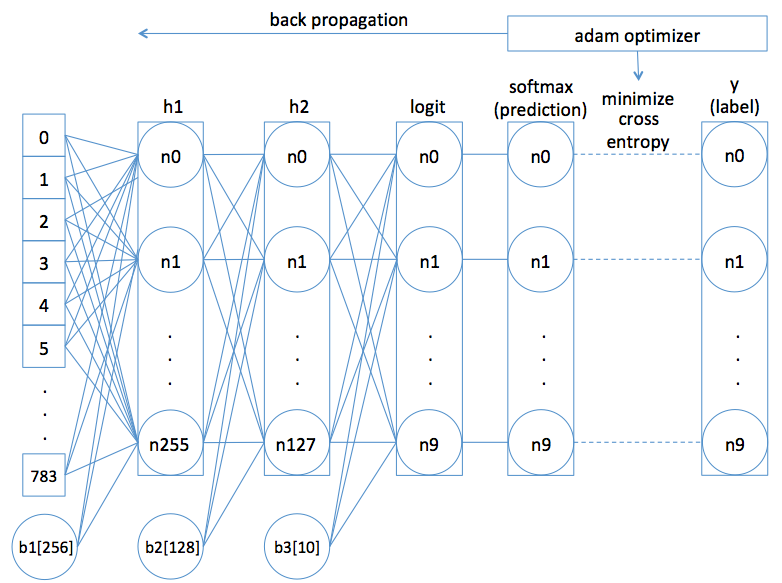)

In [17]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
#x = tf.placeholder(tf.float32, shape=(1000))
#y = tf.placeholder(tf.float32, shape=(10))

In [18]:
y_train.shape

(50000, 10)

In [19]:
def mlp(x):
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([784,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    # output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h2, w3) + b3
    
    return logits

In [20]:
logits = mlp(x)

In [21]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=y))

In [22]:
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

In [23]:
# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 30
batch_size = 1000
iteration = len(x_train) // batch_size

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss / iteration
            
        # Validate model
        preds = tf.nn.softmax(logits)  # Apply softmax to logits
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        print("epoch: "+str(epoch)+", validation accuracy: " 
              + str(cur_val_acc) +', loss: '+str(avg_loss))
    
    # Test model
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))

epoch: 0, validation accuracy: 0.1904, loss: 9780.587419433592
epoch: 1, validation accuracy: 0.7873, loss: 318.36351928710957
epoch: 2, validation accuracy: 0.8657, loss: 15.481413993835448
epoch: 3, validation accuracy: 0.8829, loss: 9.775306348800658
epoch: 4, validation accuracy: 0.8891, loss: 7.699850530624389
epoch: 5, validation accuracy: 0.8905, loss: 6.551825780868531
epoch: 6, validation accuracy: 0.8876, loss: 5.625617136955262
epoch: 7, validation accuracy: 0.8901, loss: 4.941276679039001
epoch: 8, validation accuracy: 0.8926, loss: 5.673667945861816
epoch: 9, validation accuracy: 0.8943, loss: 5.091548323631287
epoch: 10, validation accuracy: 0.8965, loss: 4.915771031379698
epoch: 11, validation accuracy: 0.9017, loss: 5.325502042770383
epoch: 12, validation accuracy: 0.8897, loss: 4.3495907497406
epoch: 13, validation accuracy: 0.8615, loss: 7.724139299392702
epoch: 14, validation accuracy: 0.8948, loss: 56.29889921188357
epoch: 15, validation accuracy: 0.9105, loss: 7.43